In [1]:
% matplotlib inline
% load_ext autoreload
% autoreload 2

In [43]:
from __future__ import print_function
import tensorflow as tf
import numpy as np
from deep_visual_odometry.kitti_utils import KITTIdata
from matplotlib import pyplot as plt
import pickle

In [3]:
basedir = 'dataset'

In [4]:
from deep_visual_odometry.odometry_model import OdomModel

In [30]:
batch_size = 256         # Sequences per batch
num_steps = 16         # Number of sequence steps per batch
rnn_size = 128          # Size of hidden layers in rnn_cell
num_layers = 4           # Number of hidden layers
learning_rate = 0.001   #learning rate

In [31]:
kitti_data = KITTIdata(basedir, 
                       sequences = ['00', '01'],
                       sequence_len = num_steps,
                       val_frac = 0,
                       test_frac = 0,
                       img_size=(150,50))

completed load sequence 00 data
completed load sequence 01 data


In [32]:
kitti_data.normalize()

normalized data


In [73]:
def save_obj(obj,filename):
    with open(filename, 'wb') as filehandler:
        pickle.dump(obj, filehandler)
def load_obj(filename):
    with open(filename, 'rb') as filehandler:
        return pickle.load(filehandler)

In [136]:
model = OdomModel(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate)
loss = model.train(kitti_data, max_count = 3000, save_every_n = 500, sequences = ['00'])

output size (256, 16, 128)
seq_output shape (256, 16, 128)
shape of outputs (256, 16, 3)
shape of targets (256, 16, 3)
step: 25  loss: 0.2952  0.6846 sec/batch
step: 50  loss: 0.2240  0.7339 sec/batch
step: 75  loss: 0.1900  0.6933 sec/batch
step: 100  loss: 0.1846  0.7325 sec/batch
step: 125  loss: 0.1483  0.6914 sec/batch
step: 150  loss: 0.1483  0.7021 sec/batch
step: 175  loss: 0.1362  0.6964 sec/batch
step: 200  loss: 0.1341  0.7002 sec/batch
step: 225  loss: 0.1277  0.6789 sec/batch
step: 250  loss: 0.1225  0.7060 sec/batch
step: 275  loss: 0.1176  0.7071 sec/batch
step: 300  loss: 0.1190  0.7383 sec/batch
step: 325  loss: 0.1144  0.7387 sec/batch
step: 350  loss: 0.1116  0.7294 sec/batch
step: 375  loss: 0.1047  0.7434 sec/batch
step: 400  loss: 0.1074  0.6888 sec/batch
step: 425  loss: 0.0976  0.7479 sec/batch
step: 450  loss: 0.1008  0.7582 sec/batch
step: 475  loss: 0.0943  0.7322 sec/batch
step: 500  loss: 0.0959  0.7636 sec/batch
step: 525  loss: 0.0958  0.6948 sec/batch
st

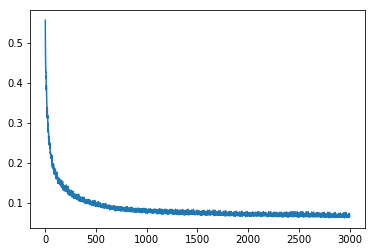

In [137]:
plt.plot(loss)

In [138]:
model = OdomModel(batch_size = batch_size, 
                  num_steps = num_steps,
                  cell_type = 'GRU',
                  rnn_size = rnn_size,
                  num_layers = num_layers,
                  learning_rate = learning_rate,
                  sampling = True)

output size (1, 1, 128)
seq_output shape (1, 1, 128)
shape of outputs (1, 1, 3)
shape of targets (1, 1, 3)


In [139]:
inputs, inter_inputs, targets = kitti_data.get_full_sequence(sequence = '00')
inter_inputs.shape

(4540, 5)

In [140]:
checkpoint = tf.train.latest_checkpoint('checkpoints')
predictions = model.test(checkpoint, inter_inputs, priming_len = 4540)
predictions.shape

INFO:tensorflow:Restoring parameters from checkpoints/i3001_l128.ckpt


(4540, 3)

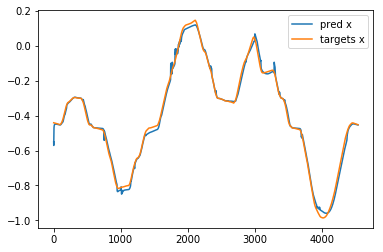

In [141]:
j = 0
plt.plot(predictions[:,j],label = 'pred x')
plt.plot(targets[:,j],label = 'targets x')
plt.legend()
plt.savefig('x_predictions_RNN_iter1000.jpg')
plt.show()

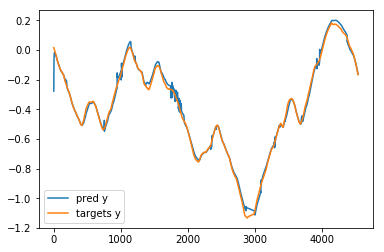

In [142]:
j = 1
plt.plot(predictions[:,j],label = 'pred y')
plt.plot(targets[:,j],label = 'targets y')
plt.legend()
plt.savefig('y_predictions_RNN_iter1000.jpg')
plt.show()

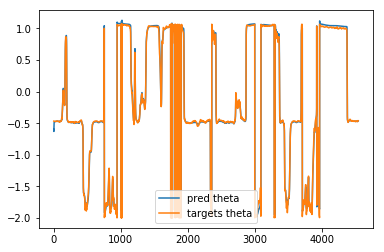

In [143]:
j = 2
plt.plot(predictions[:,j],label = 'pred theta')
plt.plot(targets[:,j],label = 'targets theta')
plt.legend()
plt.savefig('theta_predictions_RNN_iter1000.jpg')
plt.show()

Text(0,0.5,'y')

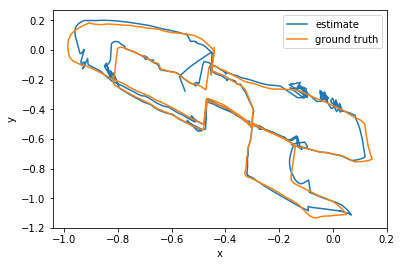

In [144]:
l = 4540
plt.plot(predictions[0:l,0],predictions[0:l,1],label = 'estimate')
plt.plot(targets[0:l,0],targets[0:l,1],label = 'ground truth')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')